# Indonesia Climate Analysis 

## By Putu Angga Kurniawan 

### Introduction

This section is dedicated to an in-depth analysis of the “Climate Data Daily IDN” dataset. This dataset provides a comprehensive view of various climate parameters recorded daily across different regions in Indonesia.

The dataset includes variables such as:

- Daily Maximum Temperature (Tx): The highest temperature recorded in a day.
- Daily Minimum Temperature (Tn): The lowest temperature recorded in a day.
- Daily Average Temperature (Tavg): The average temperature recorded in a day.
- Daily Rainfall (RR): The amount of rainfall recorded in a day.
- Maximum Daily Humidity (RH_max): The highest humidity level recorded in a day.
- Minimum Daily Humidity (RH_min): The lowest humidity level recorded in a day.
- Max Wind Speed (ff_x): The maximum wind speed recorded in a day.
- Wind Direction at Maximum Speed (ddd_x): The direction of the wind when the maximum speed was recorded.
- Average Wind Speed (ff_avg): The average wind speed recorded in a day.
- Most Wind Direction (ddd_car): The most frequent wind direction recorded in a day.

Through this analysis, we aim to uncover patterns and trends in the climate data, understand the relationships between different climate parameters, and gain insights that could be valuable for various applications, from weather forecasting to climate change research.

### Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from windrose import WindroseAxes
import calendar

### Import Datasets

In [2]:
df0 = pd.read_csv('climate_data.csv')

In [3]:
df_station = pd.read_csv('station_detail.csv')

In [5]:
df_province=pd.read_csv('province_detail.csv')

In [6]:
df0.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


In [8]:
df0.nunique()

date          4018
Tn             218
Tx             254
Tavg           202
RH_avg          81
RR            1734
ss             188
ff_x            70
ddd_x          373
ff_avg          57
ddd_car          9
station_id     173
dtype: int64

In [9]:
df_province.head(5)

,province_id,province_name
0,1,Nanggroe Aceh Darussalam
1,2,Sumatera Utara
2,3,Sumatera Barat
3,4,Riau
4,5,Jambi


In [10]:
df_province.nunique()

province_id      34
province_name    34
dtype: int64

In [11]:
df_station.head(5)

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1


In [12]:
df_station.nunique()

station_id      192
station_name    192
region_name     150
latitude        187
longitude       188
region_id       150
province_id      34
dtype: int64

In [13]:
# merging 3 csv
df_merg = df_station.merge(df_province, on=["province_id"], how='left')
df_merg_last = df0.merge(df_merg, on=["station_id"], how='left')
df = df_merg_last.copy()

In [14]:
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam


### Missing Value 

In [15]:
# Missing Value Info 
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("red", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

In [16]:
missing_value_table(df0)

,Missing Values,% Value
RR,125384,21
RH_avg,48182,8
Tavg,45105,7
ss,43721,7
Tx,37736,6
Tn,23383,3
ddd_car,13739,2
ddd_x,13128,2
ff_x,10214,1
ff_avg,10127,1


<AxesSubplot:>

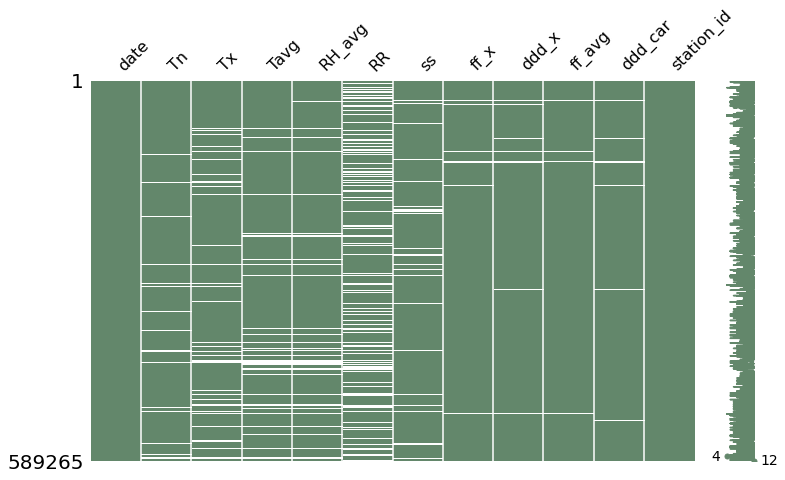

In [17]:
msno.matrix(df0, figsize=(12,7), color=(0.39, 0.53, 0.42))

### Outlier 

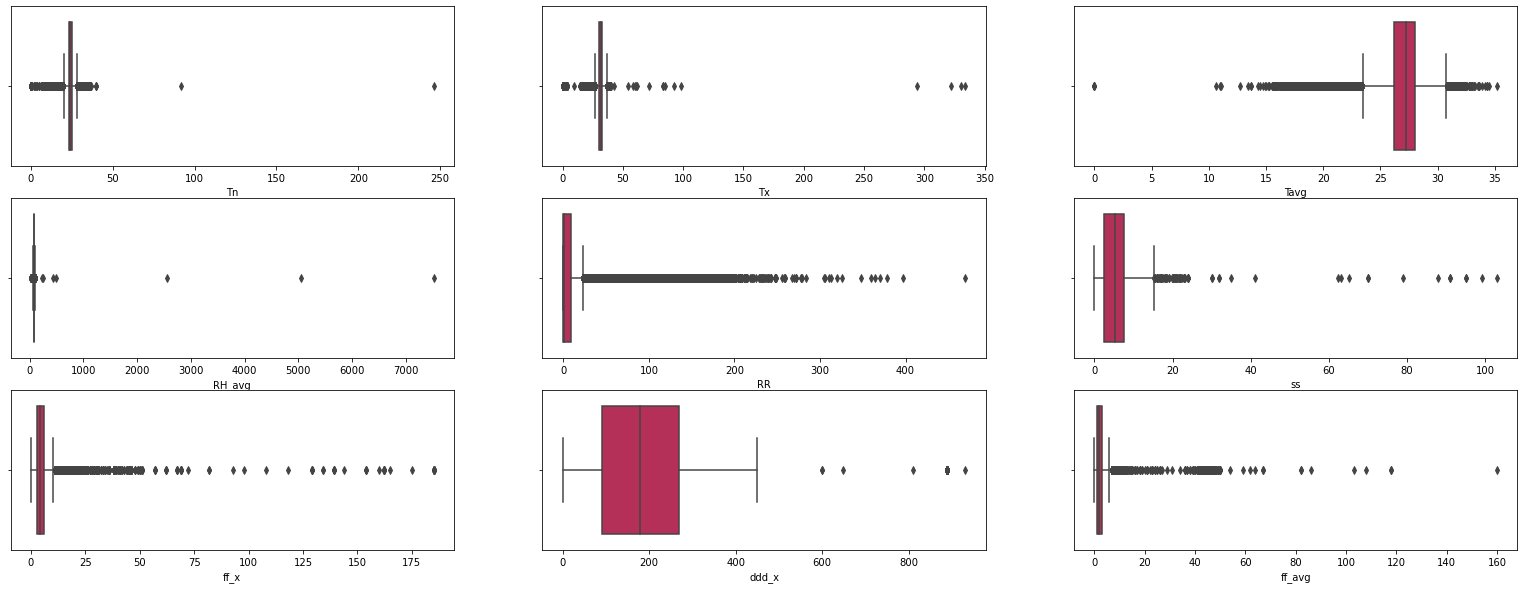

In [41]:
df_box_plot=df[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x','ddd_x','ff_avg']]
# elimizde numeric olarak gözüken tüm datanin Outlier box grafigi

i = 1
plt.figure(figsize=(27, 10))
for feature in df_box_plot.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_box_plot[feature], palette="rocket_r")
    i += 1

Based on the output, there are a lot of outlier in each of the variables 

### Stations Distribution Map

C:\Users\mades\AppData\Local\Temp\ipykernel_29936\2916920852.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


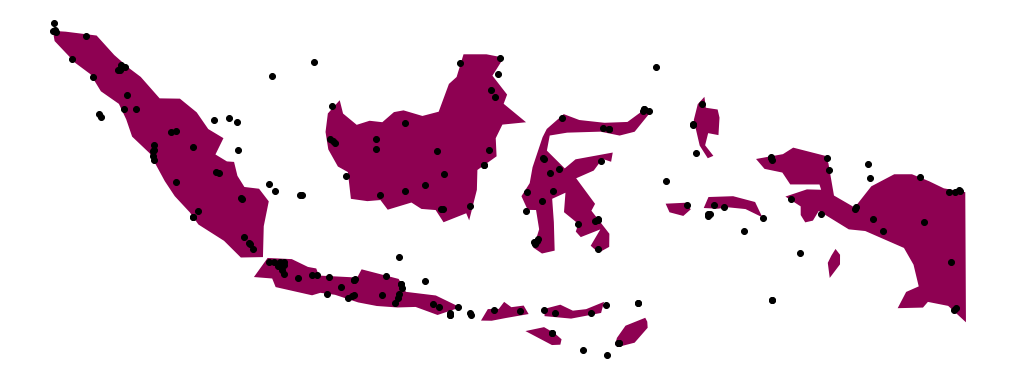

In [18]:
geometry = [Point(xy) for xy in zip(df_station['longitude'], df_station['latitude'])]
gdf      = GeoDataFrame(df_station, geometry=geometry) 

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax    = world[world.name == 'Indonesia'].plot(cmap='PiYG', figsize = (18,15))
ax.set_axis_off()
gdf.plot(ax=ax, marker='o', color='black')
None

It shows the distribution of weather stations across the country

In [19]:
# creating new column day month year
date_list=['date_day','date_month','date_year']
x=0
for i in date_list:
    df[i] = df['date'].str.split('-').str[x]
    df[i] = pd.to_numeric(df[i], downcast="float")
    x+=1

In [20]:
df.head(1)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,station_name,region_name,latitude,longitude,region_id,province_id,province_name,date_day,date_month,date_year
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,...,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,1.0,1.0,2010.0


In [21]:
#changing date column datatypes
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.strftime('%d/%m/%Y')

C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '13-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '14-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '15-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '16-01-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.

C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '15-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '16-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '17-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.py:2: UserWarning: Parsing '18-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.date = pd.to_datetime(df.date)
C:\Users\mades\AppData\Local\Temp\ipykernel_29936\351297801.

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tn,565882.0,23.312111,2.280687,0.00000,23.00,24.00000,25.000,246.00000
Tx,551529.0,31.528955,2.311659,0.00000,30.50,31.80000,33.000,334.00000
Tavg,544160.0,26.855475,1.939656,0.00000,26.20,27.20000,28.000,141.60000
RH_avg,541083.0,82.489365,14.337669,24.00000,79.00,83.00000,87.000,7520.00000
RR,463881.0,8.680760,17.928752,-1.00000,0.00,1.00000,9.300,1965.50000
ss,545544.0,5.083199,3.261586,0.00000,2.50,5.30000,7.600,705.00000
ff_x,579051.0,4.709601,2.612285,0.00000,3.00,4.00000,6.000,185.00000
ddd_x,576137.0,188.488325,107.657452,0.00000,90.00,180.00000,270.000,931.00000
ff_avg,579138.0,1.956680,1.803358,0.00000,1.00,2.00000,3.000,160.00000
station_id,589265.0,96832.949230,542.419161,96001.00000,96293.00,96797.00000,97240.000,97980.00000


In [23]:
df['Tavg'].nlargest(5)

271470    141.6
127865    141.5
202933     35.2
39721      34.5
253186     34.3
Name: Tavg, dtype: float64

In [24]:
# drop wrong nlargest 2 value
df.drop(df['Tavg'].nlargest(2).index, axis=0, inplace=True)

In [25]:
df['RR'].nlargest(10)

357063    1965.5
357062    1460.5
357045    1442.0
357060    1142.0
83847      470.0
273653     397.4
85021      378.0
84935      370.3
318492     364.1
553107     360.0
Name: RR, dtype: float64

In [26]:
# drop wrong nlargest 4 value
df.drop(df['RR'].nlargest(4).index, axis=0, inplace=True)

In [27]:
df['ss'].nlargest(10)

347544    705.0
588501    303.0
300295    103.0
299764     99.0
299712     95.0
587646     95.0
299612     91.0
299731     91.0
309885     88.0
299614     79.0
Name: ss, dtype: float64

In [28]:
# drop wrong largest 2 value
df.drop(df['ss'].nlargest(2).index, axis=0, inplace=True)

In [29]:
df.reset_index(drop=True, inplace=True)

In [30]:
# Created new column with Max Min Temp (Tx,Tn)
df["diff_temp"] = df["Tx"] - df["Tn"]

### Average Rain Monthly 

In [31]:
df_rainn = df[['RR','date_day','date_month','date_year']]

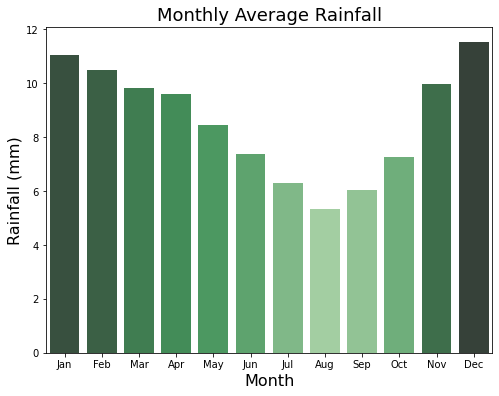

In [35]:
df_mount = df_rainn.groupby('date_month',as_index=False)['RR'].mean()
df_mount['date_month']=[calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df_mount['date_month']]
ranks    = df_mount.RR.rank().sub(1).astype(int).array
palette  = sns.color_palette('Greens_d', len(ranks))
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_mount, x = 'date_month', y = 'RR', palette=np.array(palette)[ranks])
plt.title('Monthly Average Rainfall', fontsize=18)
plt.ylabel('Rainfall (mm)', size=16)
plt.xlabel('Month', size=16)
None

The average rainfall monthly shows a consistant decrease in the first 8 months then a consistant increase in the last 4 months 

### Average Rainfall in The Last 10 Years

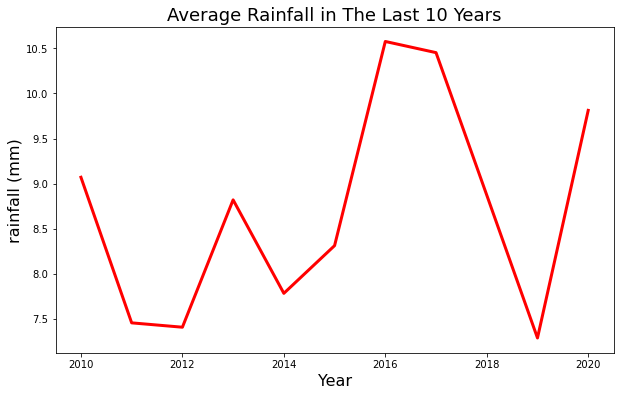

In [36]:
df_y = df_rainn.groupby('date_year',as_index=False)['RR'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_y ,x='date_year', y='RR', color="red", linewidth=3.0)
plt.title('Average Rainfall in The Last 10 Years', fontsize=18)
plt.ylabel('rainfall (mm)', size=16)
plt.xlabel('Year', size=16)
None

The plot shows that the highest average rainfall in the last 10 years is in around 2016 , meanwhile the lowest is in around 2011-2012

### Average Temperature in The Last 10 Years

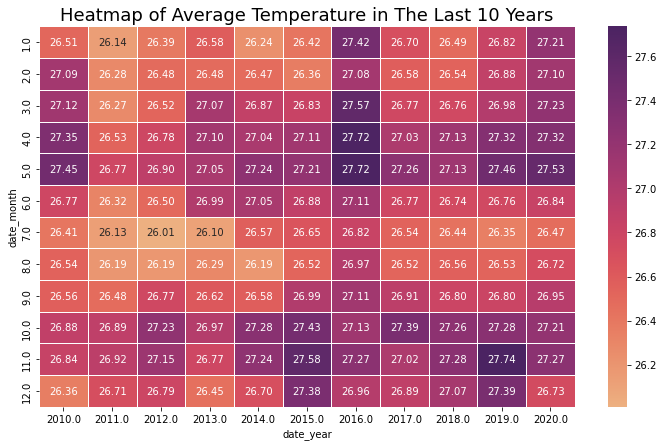

In [39]:
df_rx = df.groupby(['date_year','date_month'],as_index=False)[['Tavg']].mean()
temp_matrix = df_rx.pivot("date_month", "date_year", "Tavg")
fig = plt.figure(figsize=(12,7))
r = sns.heatmap(temp_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=.5)
r.set_title("Heatmap of Average Temperature in The Last 10 Years" ,fontsize=18)
None

From the heatmap, we can observe a general trend of increasing temperatures over the years. This is indicated by the color of the cells becoming progressively more yellow from left to right. This suggests that the average temperature has been rising over the past decade.

### Annual Average Temperature Change by Region 

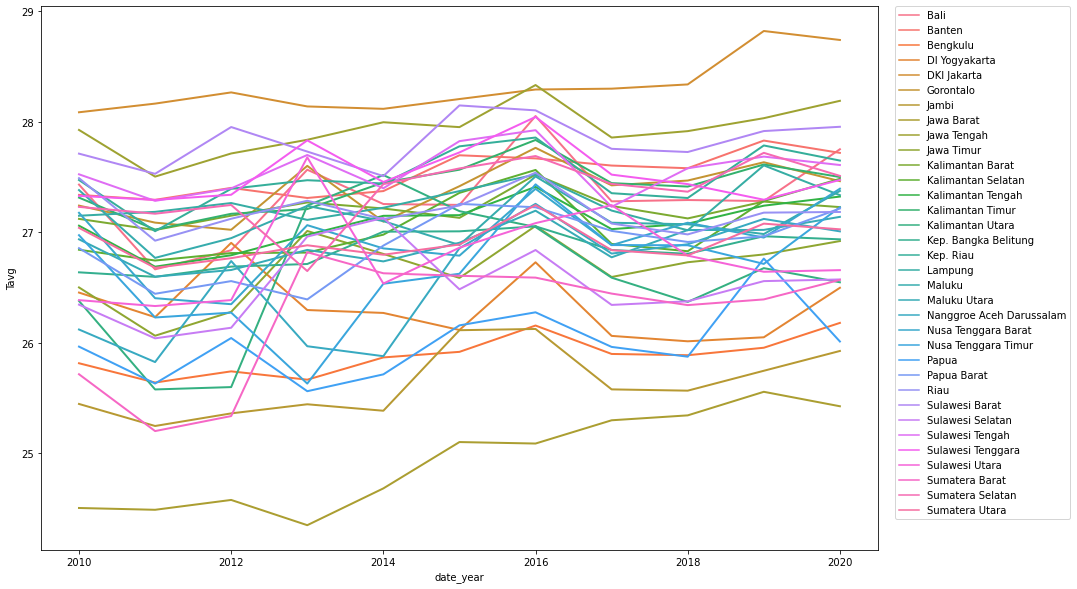

In [40]:
df_r = df.groupby(['date_year','province_name'],as_index=False)[['RR','ss','Tavg']].mean()
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_r, x='date_year',y='Tavg', hue='province_name',linewidth=2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

All regions have experienced some fluctuations in scores over the years. However, without additional context or data, it’s difficult to interpret what these scores represent and why they might be changing.

### Average Temperature & Rainfall 

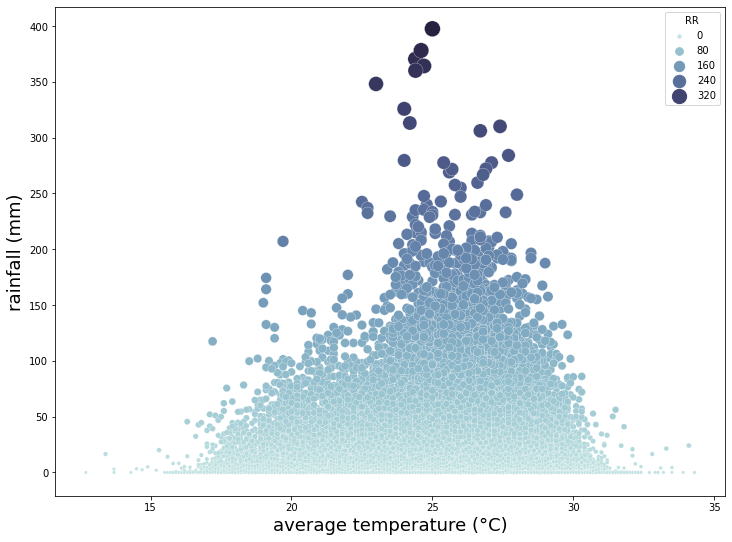

In [44]:
df_year = df.loc[(df["Tavg"] <50) & (df["RR"] <500)]
df_year = df_year.dropna(how="any", axis=0)
# scatter plot
plt.figure(figsize=(12,9))
sns.scatterplot(data=df_year, x ="Tavg", y ="RR", hue="RR", size="RR", sizes=(10, 250), palette='ch:start=.2,rot=-.3')
plt.xlabel("average temperature (°C)", size=18)
plt.ylabel("rainfall (mm)", size=18)
None

From the plot, it can observe that there is no clear correlation between average temperature and rainfall. The points are spread out across the plot, indicating that rainfall varies widely for the same average temperature. This suggests that other factors, not captured in this plot, might influence rainfall.

### Top 10 Average High Temperature by Province

In [45]:
df.groupby(["province_name"]).mean()["Tavg"].sort_values(ascending=False)[:10]

province_name
DKI Jakarta          28.285858
Jawa Tengah          27.930590
Sulawesi Barat       27.805781
Sulawesi Tengah      27.536687
Banten               27.522975
Kep. Riau            27.499683
Sulawesi Tenggara    27.491315
Kalimantan Timur     27.413652
Sumatera Selatan     27.360074
Gorontalo            27.349468
Name: Tavg, dtype: float64

The output shows the average temperature (‘Tavg’) for different provinces in Indonesia. Here are the top 10 provinces with their respective average temperatures:

1. DKI Jakarta: 28.29°C
2. Jawa Tengah: 27.93°C
3. Sulawesi Barat: 27.81°C
4. Sulawesi Tengah: 27.54°C
5. Banten: 27.52°C
6. Kep. Riau: 27.50°C
7. Sulawesi Tenggara: 27.49°C
8. Kalimantan Timur: 27.41°C
9. Sumatera Selatan: 27.36°C
10. Gorontalo: 27.35°C

In [46]:
df.groupby(["province_name"]).mean()["ff_avg"].sort_values(ascending=False)[:10]

province_name
Bali                    2.823592
Papua Barat             2.717968
Kep. Bangka Belitung    2.713806
Nusa Tenggara Timur     2.469901
Nusa Tenggara Barat     2.440931
Maluku                  2.391076
Bengkulu                2.348285
Jawa Tengah             2.280275
Kep. Riau               2.259437
DKI Jakarta             2.228097
Name: ff_avg, dtype: float64

The output shows the average wind speed (‘ff_avg’) for different provinces in Indonesia. Here are the top 10 provinces with their respective average wind speeds:

1. Bali: 2.82 m/s
2. Papua Barat: 2.72 m/s
3. Kep. Bangka Belitung: 2.71 m/s
4. Nusa Tenggara Timur: 2.47 m/s
5. Nusa Tenggara Barat: 2.44 m/s
6. Maluku: 2.39 m/s
7. Bengkulu: 2.35 m/s
8. Jawa Tengah: 2.28 m/s
9. Kep. Riau: 2.26 m/s
10. DKI Jakarta: 2.23 m/s

### Monthly Average Sunshine Duration (hour)

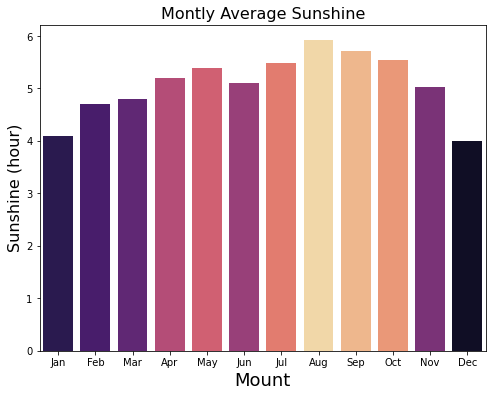

In [49]:
df_ss    = df.groupby('date_month',as_index=False)['ss'].mean()
df_ss['date_month']=[calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df_ss['date_month']]
ranks    = df_ss.ss.rank().sub(1).astype(int).array
palette  = sns.color_palette('magma', len(ranks))

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_ss, x = 'date_month', y = 'ss', palette=np.array(palette)[ranks])
plt.title('Montly Average Sunshine', fontsize=16)
plt.ylabel('Sunshine (hour)', size=16)
plt.xlabel('Mount', size=18)
None

From the graph, we can observe that the highest average sunshine hours occur in July, indicating that this is typically the sunniest month of the year. Conversely, the lowest average sunshine hours occur in December, suggesting that this is typically the least sunny month.

### Wind direction - Wind speed (m/s)

In [50]:
def box_plot(x ,xlabel, title):
    plt.figure(figsize=(25, 8))
    sns.boxplot(data= df_year, x= x, y='ddd_car', palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, size=18)
    plt.ylabel("Most wind direction (°)", size=18)
    sns.despine(left=True)

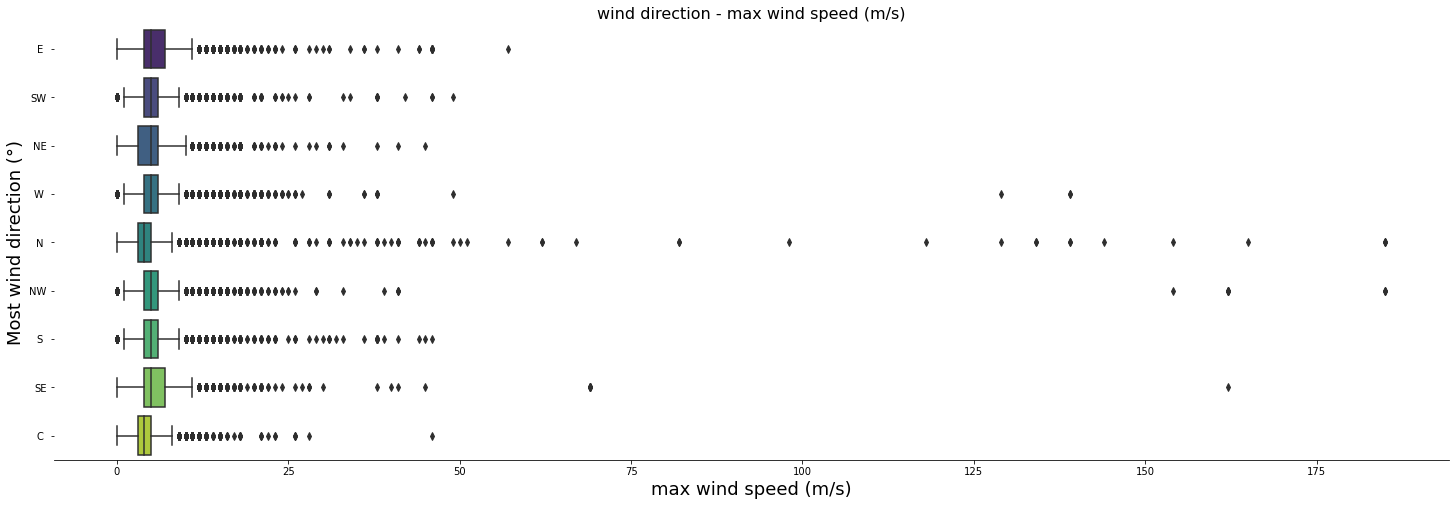

In [51]:
box_plot('ff_x', "max wind speed (m/s)", 'wind direction - max wind speed (m/s)' )

The scatter plot represents the relationship between wind direction and maximum wind speed. The x-axis represents the maximum wind speed in meters per second, and the y-axis represents the wind direction in degrees.

From the plot, we can observe that the data points are spread across all quadrants, indicating that the wind direction varies widely for different wind speeds. However, there seems to be a higher concentration of points in the lower wind speed range, suggesting that higher wind speeds are less common.

The colored bars in each quadrant represent the wind direction. They show that the wind direction is evenly distributed across all directions, as the bars are approximately the same length in each quadrant.

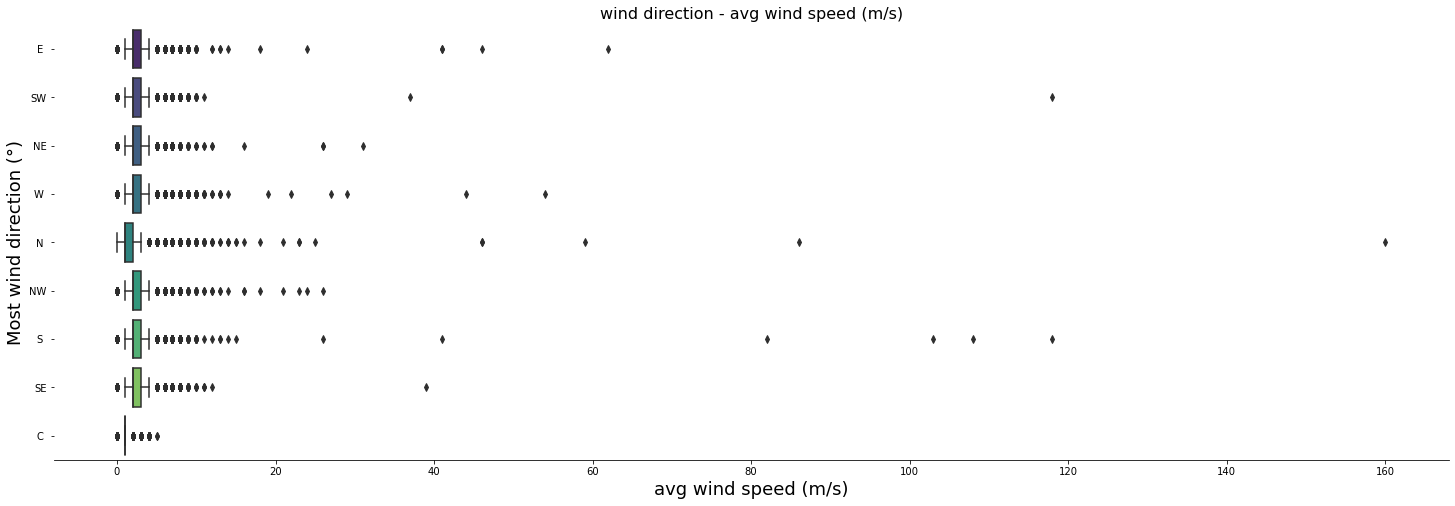

In [52]:
box_plot('ff_avg', "avg wind speed (m/s)", 'wind direction - avg wind speed (m/s)' )

The scatter plot represents the relationship between wind direction and average wind speed. The x-axis represents the average wind speed in meters per second, and the y-axis represents the wind direction in degrees.

From the plot, we can observe that the data points are spread across all quadrants, indicating that the wind direction varies widely for different wind speeds. However, there seems to be a higher concentration of points in the lower wind speed range, suggesting that higher wind speeds are less common.

The plot is divided into four sections, each representing a different wind direction: North, East, South, and West. This shows that the wind speed is higher in the East and West directions, and lower in the North and South directions.

### Maximum & Minimum Temperature

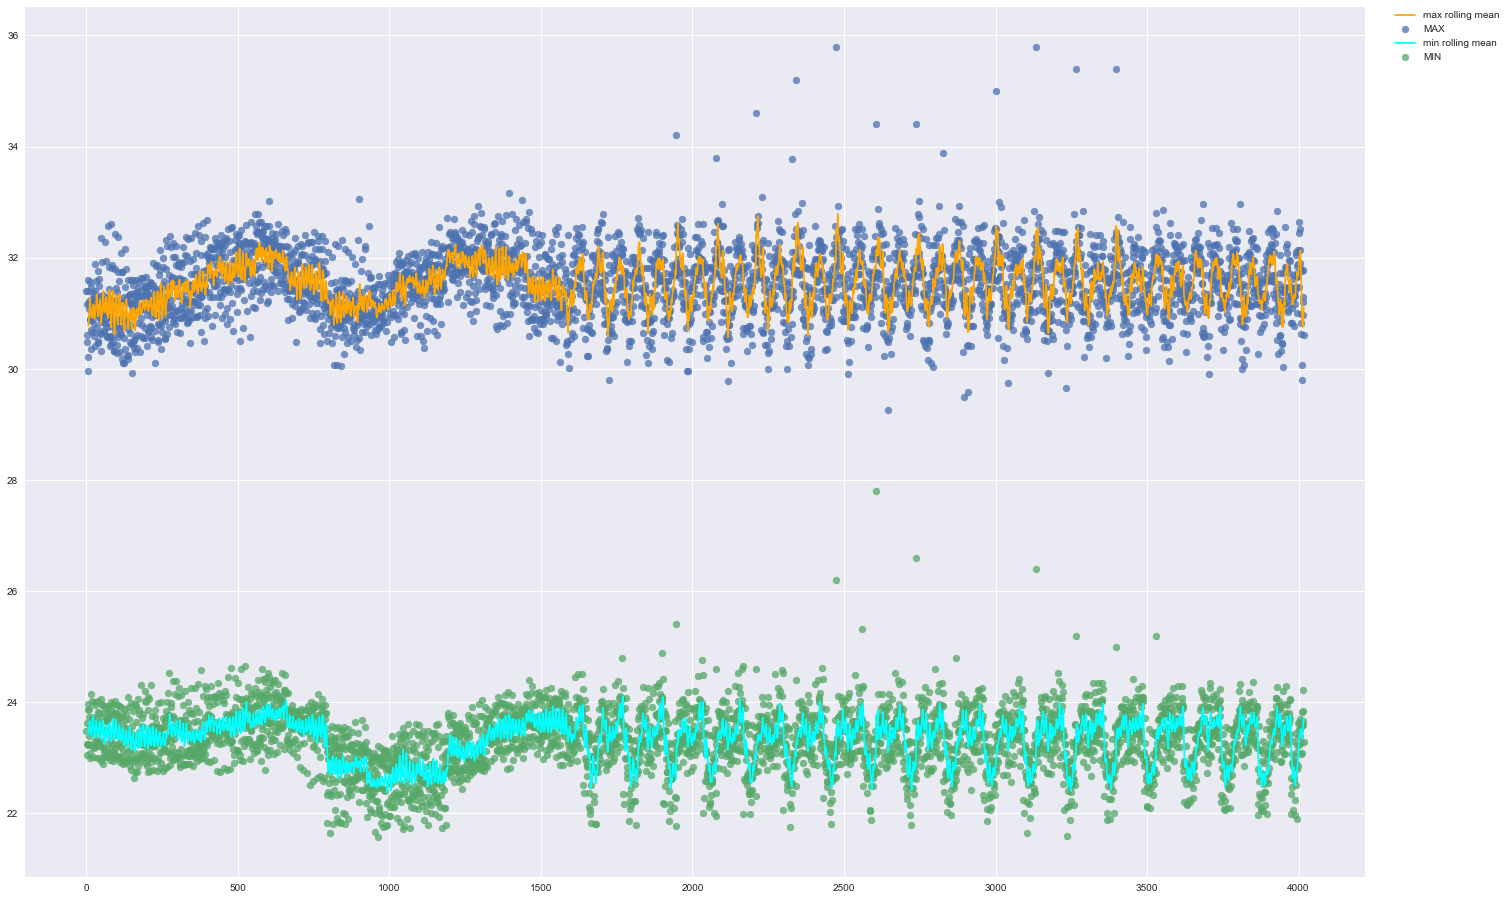

In [53]:
df_max = df.groupby('date',as_index=False)['Tx'].mean()
df_min = df.groupby('date',as_index=False)['Tn'].mean()


df_max['rolling'] = df_max.Tx.rolling(7).mean()
df_min['rolling'] = df_min.Tn.rolling(7).mean()

# plot styling parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams["patch.force_edgecolor"] = True

# plot the data
fig, ax = plt.subplots()
ax.plot(df_max.index, 'rolling', data=df_max, label='max rolling mean' , color='orange')
ax.scatter(x= df_max.index, y='Tx', data=df_max, alpha=0.75, label='MAX')

ax.plot(df_min.index, 'rolling', data=df_min, label='min rolling mean',color='cyan')
ax.scatter(x= df_min.index, y='Tn', data=df_min, alpha=0.75, label='MIN')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


The plot shows the distribution of the maximum and minimum temperature which is equally distributed.

### Correlation Heatmap

<AxesSubplot:>

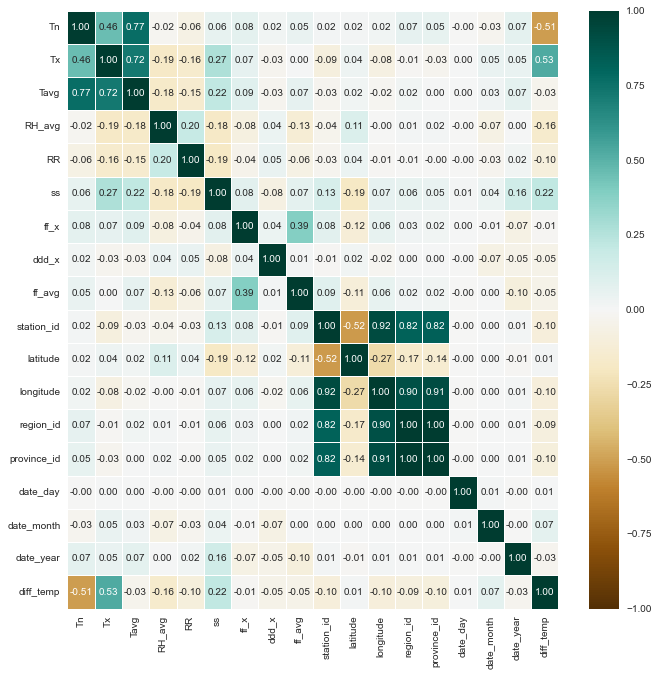

In [54]:
fig, ax = plt.subplots(figsize=(11,11))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

The heatmap represents a grid of data where the rows and columns are labeled with different variables. The color of each cell corresponds to the value of the data in that cell, with the color scale ranging from green (highest values) to orange (lowest values). Where darker red colors indicate higher values and darker green colors indicate lower values.

### WindRose

In [55]:
#filtered avg wind speed < 8
df_wind = df.loc[(df["ff_avg"] < 8)]
df_wind = df_wind.dropna(how="any", axis=0)

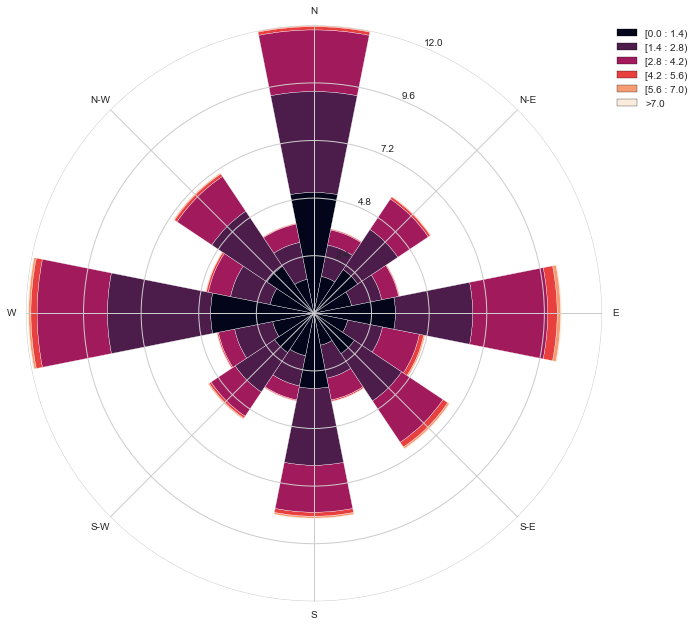

In [56]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
# Plot the windrose
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df_wind.ddd_x, df_wind.ff_avg, normed=True, opening=1, edgecolor='white')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
None

The circular plot, often referred to as a wind rose diagram, represents data related to wind direction and speed. The plot is divided into 8 sections, each representing a cardinal and intercardinal direction: North (N), Northeast (NE), East (E), Southeast (SE), South (S), Southwest (SW), West (W), and Northwest (NW).

The color of each section corresponds to the frequency of the wind coming from that direction, with the color scale ranging from light purple (lowest frequency) to dark purple (highest frequency). The values range from 0-14, 14-28, 28-42, 42-56, 56-70, and 70+, indicating the wind speed in each direction.

From the plot, we can observe that the wind tends to come more frequently from certain directions and at certain speeds.

### Conclusion 

In conclusion, the analysis of the “Climate Data Daily IDN” dataset has provided valuable insights into the various climate parameters recorded daily across different regions in Indonesia. We’ve observed patterns and trends in temperature, rainfall, humidity, and wind speed, and explored their relationships with each other.

The dataset has proven to be a rich source of information for understanding the climate of Indonesia. The insights gained from this analysis could be valuable for various applications, from weather forecasting to climate change research.

However, it’s important to note that climate is a complex system influenced by many factors. While this analysis provides a snapshot of the climate based on the available data, further research and more comprehensive data would be needed to fully understand the intricacies of Indonesia’s climate.